In [5]:
# Import Required Libraries
import pandas as pd
from tabula import read_pdf  # For PDF table extraction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
!pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.6 MB/s eta 0:00:00


In [1]:
!pip install tabula-py


Loading the data

In [ ]:
# Load the Excel File
excel_file_path = '/content/JL-GAUDI_Loan_Data_1.xlsx'
excel_data = pd.read_excel(excel_file_path)

# Load the PDF File
pdf_file_path = '/content/O2-GAUDI_Loans_Database_Table_1.pdf'
pdf_data = read_pdf(pdf_file_path, pages='all', pandas_options={'header': 0})[0]

# Preview Initial Data
print("Excel Data Preview:")
print(excel_data.head())
print("\nPDF Data Preview:")
print(pdf_data.head())

In [ ]:
# Standardize Column Names
pdf_data.columns = [
    'Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
    'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
    'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'
]

print("\nExcel Data Columns:", excel_data.columns)
print("PDF Data Columns:", pdf_data.columns)

In [ ]:
# Standardize Data Types
excel_data['Loan_ID'] = excel_data['Loan_ID'].astype(str)
pdf_data['Loan_ID'] = pdf_data['Loan_ID'].astype(str)

In [ ]:
# Clean Data
excel_data = excel_data.drop_duplicates(subset='Loan_ID')
pdf_data = pdf_data.drop_duplicates(subset='Loan_ID')

excel_data['Loan_ID'] = excel_data['Loan_ID'].str.strip()
pdf_data['Loan_ID'] = pdf_data['Loan_ID'].str.strip()

In [ ]:
# Merge the Datasets
merged_data = pd.merge(
    excel_data,
    pdf_data,
    on='Loan_ID',
    how='outer',
    suffixes=('', '_pdf')  # Avoid _x and _y, use a custom suffix for clarity
)

# Resolve Overlapping Columns
for col in pdf_data.columns:
    if col != 'Loan_ID':  # Skip the key column
        merged_data[col] = merged_data[col].combine_first(merged_data[f"{col}_pdf"])
        merged_data.drop(columns=[f"{col}_pdf"], inplace=True)

# Save merged data into a new DataFrame
merged_dataframe = merged_data.copy()

In [13]:

# Preview Merged Data
print("\nMerged Data Preview:")
print(merged_dataframe.head())
print("\nMerged Data Shape:", merged_dataframe.shape)

# Save the combined dataset for further analysis
merged_dataframe.to_csv('Combined_Loan_Data.csv', index=False)
print("\nCombined data saved as 'Combined_Loan_Data.csv'")


Excel Data Preview:
   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
4     2297       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
4             2500            20000.0         103               333   

   Credit_History  Property_Area Loan_Status  
0               1              3           Y  
1               0              2           N  
2  

In [14]:
print(merged_data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Total Amount Loaned by GFS
total_loaned = merged_dataframe['LoanAmount'].sum(skipna=True)
print("Total Amount Loaned by GFS:", total_loaned)


In [ ]:
# Average Loan Amount
avg_loan_amount = merged_dataframe['LoanAmount'].mean(skipna=True)
print("Average Loan Amount:", avg_loan_amount)

In [ ]:
# Average Loan Term
avg_loan_term = merged_dataframe['Loan_Amount_Term'].mean(skipna=True)
print("Average Loan Term:", avg_loan_term)

In [ ]:
# Total Applicants (Approved vs Rejected by Gender)
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_dataframe, x='Loan_Status', hue='Gender')
plt.title("Loan Approvals by Gender")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.tight_layout()

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()


In [ ]:
# Maximum and Minimum Loan Amount
max_loan = merged_dataframe['LoanAmount'].max(skipna=True)
min_loan = merged_dataframe['LoanAmount'].min(skipna=True)

print("Maximum Loan Amount:", max_loan)
print("Minimum Loan Amount:", min_loan)

# Plot Maximum and Minimum Loans
plt.figure(figsize=(8, 5))
sns.barplot(x=["Max Loan", "Min Loan"], y=[max_loan, min_loan])
plt.title("Maximum and Minimum Loan Amounts")
plt.ylabel("Loan Amount")
plt.xlabel("Loan Type")

# Add labels to the bars
for i, value in enumerate([max_loan, min_loan]):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Total Amount Loaned by GFS: 41599.0
Average Loan Amount: 151.26909090909092
Average Loan Term: 322.8


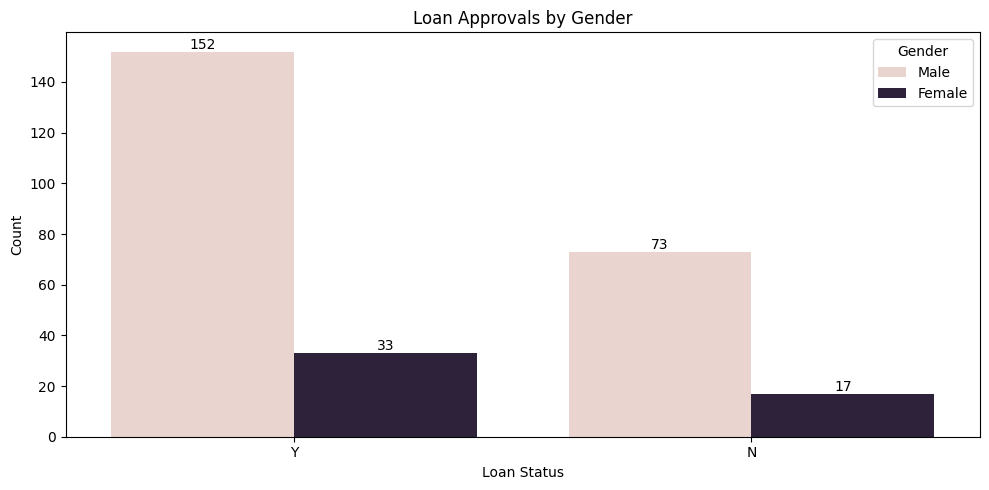

Maximum Loan Amount: 600.0
Minimum Loan Amount: 9.0


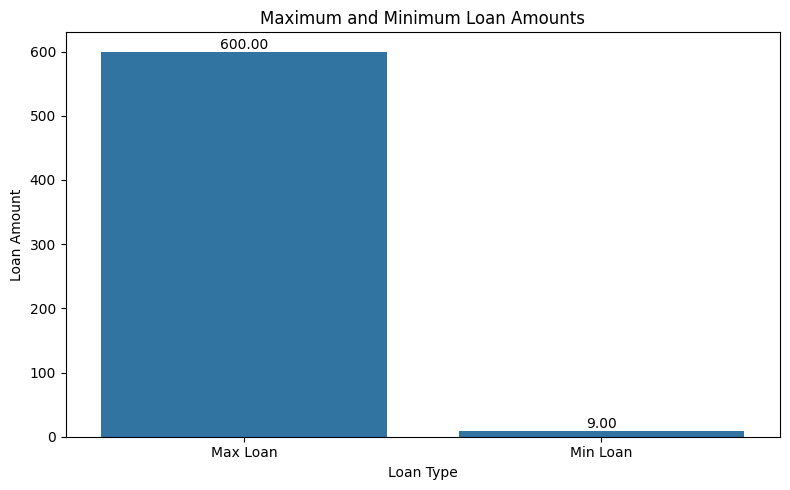

Percentage of Self-Employed Applicants Approved: 14.054054054054054


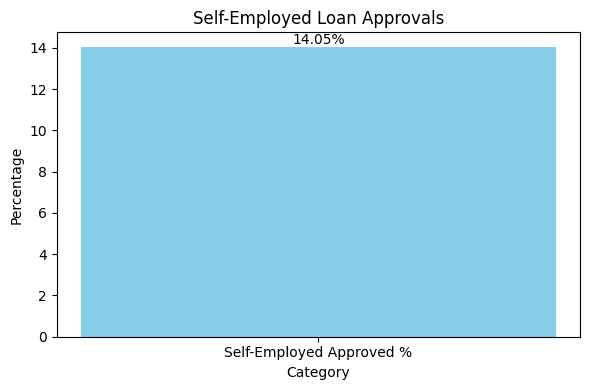

In [16]:
# Percentage of Self-Employed Applicants Approved
approved_self_employed = merged_dataframe[(merged_dataframe['Self_Employed'] == 1) & (merged_dataframe['Loan_Status'] == 'Y')]
total_approved = merged_dataframe[merged_dataframe['Loan_Status'] == 'Y']
self_employed_percentage = (len(approved_self_employed) / len(total_approved)) * 100 if len(total_approved) > 0 else 0

print("Percentage of Self-Employed Applicants Approved:", self_employed_percentage)

# Plot Self-Employed Approval Percentage
plt.figure(figsize=(6, 4))
plt.bar(["Self-Employed Approved %"], [self_employed_percentage], color='skyblue')
plt.title("Self-Employed Loan Approvals")
plt.ylabel("Percentage")
plt.xlabel("Category")

# Add labels to the bar
plt.text(0, self_employed_percentage, f"{self_employed_percentage:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Income Distribution of Main Applicants
avg_income = merged_dataframe['ApplicantIncome'].mean(skipna=True)
std_income = merged_dataframe['ApplicantIncome'].std(skipna=True)

print(f"Average Income: {avg_income:.2f}, Standard Deviation: {std_income:.2f}")

# Plot Income Distribution
plt.figure(figsize=(10, 5))
sns.histplot(merged_dataframe['ApplicantIncome'], kde=True, color='blue', label='Applicant Income')
plt.title("Income Distribution of Main Applicants")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Top Ten Applicants by Loan Amount
top_ten_loans = merged_dataframe.nlargest(10, 'LoanAmount', 'all')[['Loan_ID', 'LoanAmount']]

print("Top Ten Applicants by Loan Amount:")
print(top_ten_loans)

Average Income: 5293.49, Standard Deviation: 6202.61


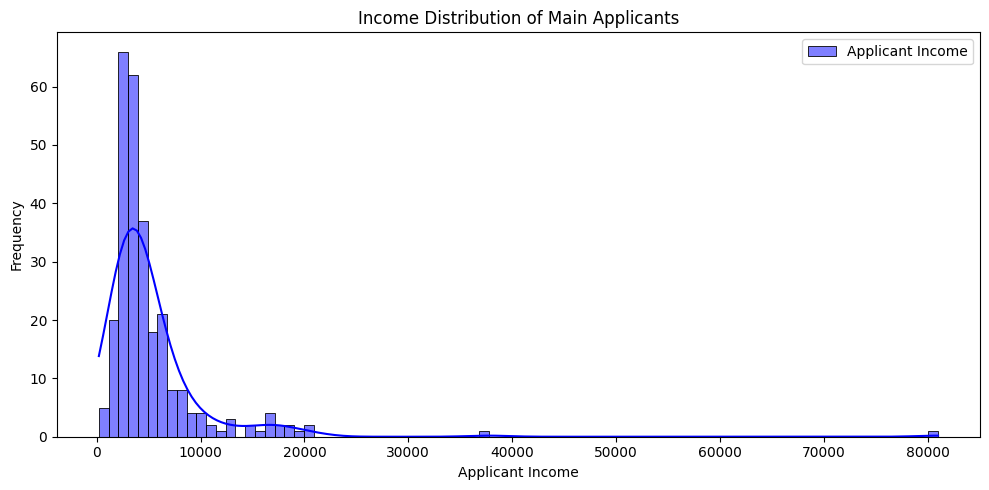

Top Ten Applicants by Loan Amount:
    Loan_ID  LoanAmount
222    2813       600.0
148    2547       500.0
265    2959       496.0
167    2624       480.0
184    2693       480.0
31     1907       436.0
93     2386       405.0
186    2699       400.0
70     2317       360.0
261    2949       350.0

Property Distribution Data:
Property_Area
2.0    101
3.0     88
1.0     86
Name: count, dtype: int64


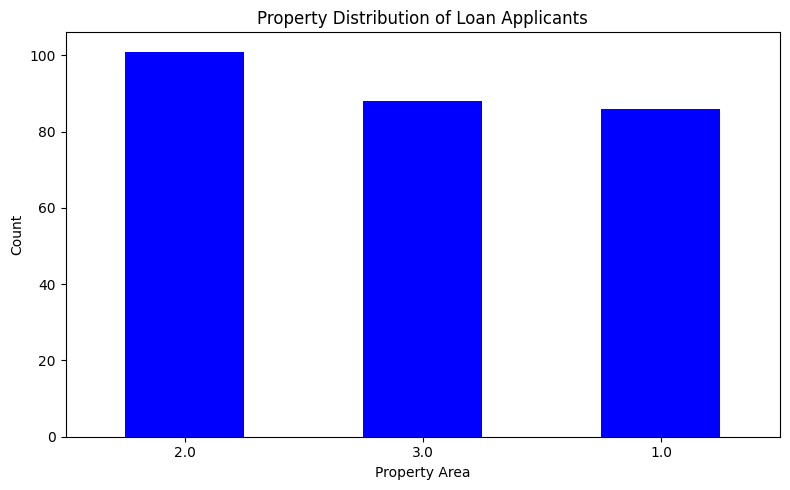

In [12]:
# Distribution of Properties (Rural, Urban, Semiurban)
property_counts = merged_dataframe['Property_Area'].value_counts()

print("\nProperty Distribution Data:")
print(property_counts)

# Plot Property Distribution
plt.figure(figsize=(8, 5))
property_counts.plot(kind='bar', color='blue')
plt.title("Property Distribution of Loan Applicants")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.xticks(ticks=range(len(property_counts)), labels=property_counts.index, rotation=0)
plt.tight_layout()
plt.show()